# INTRODUCTION

On this project, I will try to predict if customers would click on an AD depeding on their characteristics and profile.

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IMPORT DATASET

In [3]:
ad = pd.read_csv("advertising.csv")
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# GETTING IMPORTANT PIECES OF INFORMATION LIKE DATASET'S STATISTICS AND VARIABLES NAMES AND NUMBER OF VALUES

In [5]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# ANALYZING INFORMATION BY VIZ

I made a Histogram to see the range of ages of customers. In this case, the range is between 20 to 60 years old. Where the main ages are between 27-40 years old.

<AxesSubplot:ylabel='Frequency'>

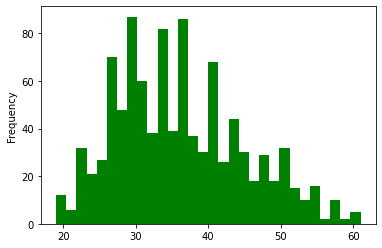

In [34]:
ad["Age"].plot.hist(bins=30, color = "green")

I drew a Kernel Density Estimate viz to see the concentration of two variables, in this case, the most commons is to have customer between 27-32 spending between USD 55,000 and USD 70,000

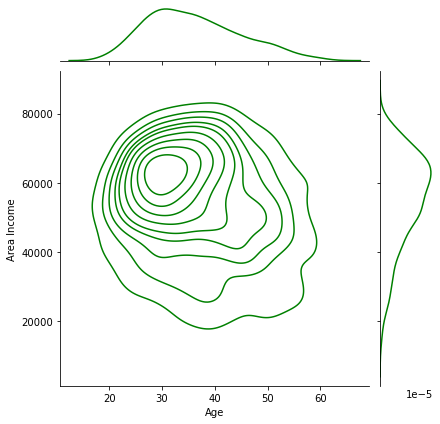

In [33]:
sns.jointplot(x= "Age", y = "Area Income", data = ad, kind = "kde", color = "green")

On this next KDE, we see two clusters between two variables, basically there are two strong patterns.

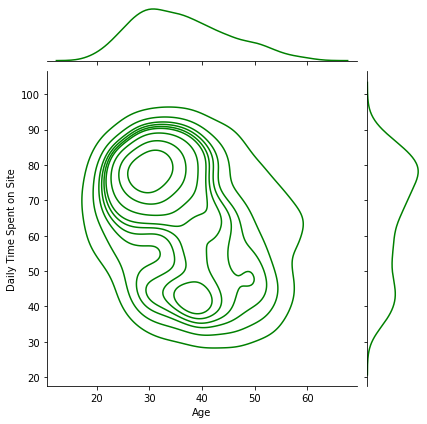

In [13]:
sns.jointplot(x="Age", y= "Daily Time Spent on Site", data = ad, kind = "kde", color = "green")

This KDE shows two patterns in our customers. The first one is that as long customers have internet, they spend more time in our site, the the second is the other way around

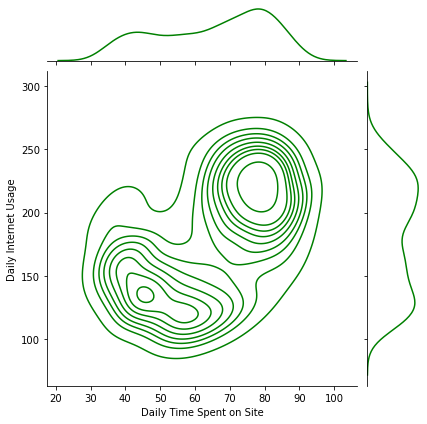

In [35]:
sns.jointplot(x="Daily Time Spent on Site", y= "Daily Internet Usage", data = ad, kind = "kde", color = "green" )

On this viz, I compared all variables against each other to fing new patterns.

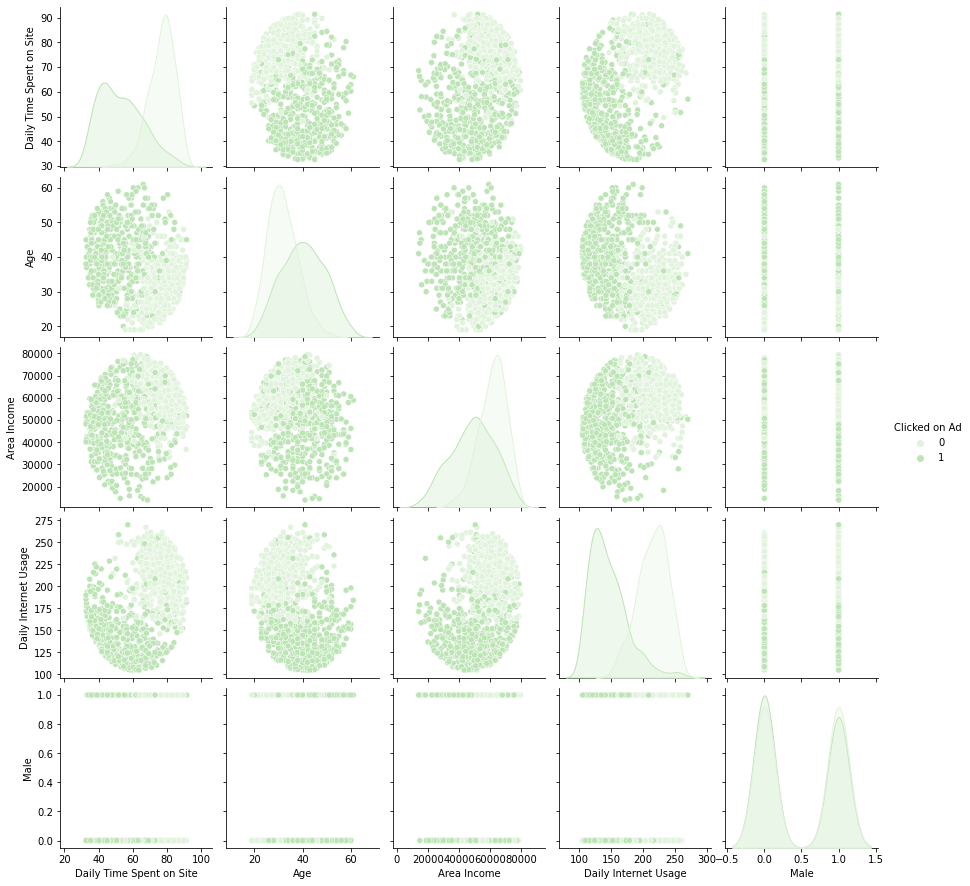

In [43]:
sns.set_palette("Greens")
sns.pairplot(ad, hue = "Clicked on Ad")

# MACHINE LEARNING

I imported the Train test split function to cut the dataset in four mini datasets to make the forecast.

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [20]:
X = ad[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male' ]]
y = ad['Clicked on Ad']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101) 

Then, I imported the Logistic Regression model to train the model and making the predictions.

In [24]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression().fit(X_train, y_train)

In [27]:
pre = logmodel.predict(X_test)

And the last part, we need to confirm if our model is calibrated correctly, we can confirm this by two metrics.

The first one is the Classification Report, it is the results of our predictions and the performance of itself.

The second one is the Confusion Matrix, it is a table with the false positive, true positive, false negative and positive negative. On this project the good results are the higher numbers, so the report is working properly.

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report: ")
print(classification_report(y_test, pre))
print("*******************************")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pre))

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

*******************************
Confusion Matrix: 
[[149   8]
 [ 14 129]]
